In [1]:
import os
import geopandas as gpd
from rasterio.plot import show
import rasterio

In [2]:
# # update the wd path to be able to laod the module
os.chdir('../..')
os.getcwd()

'C:\\Users\\Saif.Shabou\\OneDrive - World Resources Institute\\Documents\\cities-indicators-framework\\citymetrix\\cities-cif'

In [3]:
os.environ['GCS_BUCKET']='gee-exports'
os.environ['GOOGLE_APPLICATION_USER']='developers@citiesindicators.iam.gserviceaccount.com'
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='C:\\Users\Saif.Shabou\OneDrive - World Resources Institute\Documents\cities-indicators-framework\citymetrix\credentials-citiesindicators.json'

In [4]:
# load boundary
boundary_path = 'https://cities-indicators.s3.eu-west-3.amazonaws.com/data/boundaries/boundary-BRA-Salvador-ADM4union.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf.head()

,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.50140..."


In [ ]:
from city_metrix.layers.urban_land_use import UrbanLandUse

In [14]:
%%time

city_urban_land_use = UrbanLandUse().get_data(city_gdf.total_bounds)
city_urban_land_use

ValueError: max() arg is an empty sequence

# Open Street Map

In [6]:
from city_metrix.layers import OpenStreetMap

Authenticating to GEE with configured credentials file.


In [7]:
open_space_tag = {'leisure': ['park', 'nature_reserve', 'common', 'playground', 'pitch', 'track'], 
                      'boundary': ['protected_area', 'national_park']}

city_open_space = OpenStreetMap(osm_tag=open_space_tag).get_data(city_gdf.total_bounds)
city_open_space

,osmid,geometry,leisure,boundary
0,29204845,"POLYGON ((-38.41202 -12.96888, -38.41160 -12.9...",NaN,protected_area
1,29415494,"POLYGON ((-38.47611 -12.99642, -38.47608 -12.9...",park,NaN
2,29415495,"POLYGON ((-38.44212 -12.99757, -38.44152 -12.9...",park,NaN
3,48623160,"POLYGON ((-38.49373 -13.01117, -38.49374 -13.0...",pitch,NaN
4,48623169,"POLYGON ((-38.49005 -13.01025, -38.49002 -13.0...",park,NaN
...,...,...,...,...
1566,11371090,"POLYGON ((-38.49656 -12.92388, -38.49656 -12.9...",park,NaN
1567,11773655,"POLYGON ((-38.41844 -12.94592, -38.41844 -12.9...",track,NaN
1568,14205075,"POLYGON ((-38.44278 -12.98217, -38.44294 -12.9...",park,NaN
1569,14325221,"MULTIPOLYGON (((-38.36285 -12.95008, -38.36278...",park,NaN


# NaturalAreas

In [5]:
from city_metrix.layers import NaturalAreas

Authenticating to GEE with configured credentials file.


In [6]:
city_natural_areas = NaturalAreas().get_data(city_gdf.total_bounds)
city_natural_areas

<xarray.DataArray 'Map' (y: 2878, x: 3722)>
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
    time         datetime64[ns] 2020-01-01
  * x            (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3
  * y            (y) float32 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
    spatial_ref  int32 0

C:\Users\Saif.Shabou\anaconda3\lib\site-packages\xarray\core\pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")


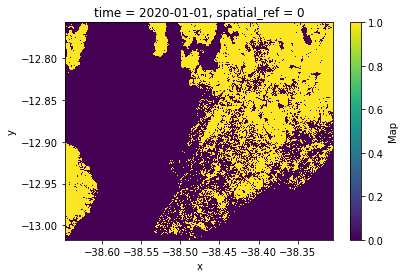

In [15]:
city_natural_areas.plot()

# Indicator urban_open_space

In [8]:
from city_metrix import urban_open_space


In [9]:
%%time

# for one geography
city_gdf["urban_open_space"] = urban_open_space(city_gdf) 
city_gdf

CPU times: total: 15.1 s
Wall time: 44 s


,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry,natural_areas,urban_open_space
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.50140...",0.464603,0.028378


# indicator natural areas

In [5]:
from city_metrix import natural_areas

Authenticating to GEE with configured credentials file.


In [6]:
%%time

# for one geography
city_gdf["natural_areas"] = natural_areas(city_gdf) 
city_gdf

CPU times: total: 2min 7s
Wall time: 2min 10s


,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry,natural_areas
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.50140...",0.464603


In [11]:
from city_metrix.layers.urban_land_use import UrbanLandUse

In [13]:
%%time

city_urban_land_use = UrbanLandUse().get_data(city_gdf.total_bounds)
city_urban_land_use

ValueError: max() arg is an empty sequence